In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pytz
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import table
from astropy import coordinates
from astropy import units as u
from astropy.io import fits
from skipper import observe, qa
from shapely import geometry
from shapely.ops import unary_union


In [3]:
sys.path.append('../scripts/')

In [4]:
#import sigjson_s2021a
import make_pointings

In [18]:
catalog, ocat = make_pointings.build_backup (filter='g')

In [25]:
catalog_l, ocat, frd_l = make_pointings.build_backup (filter=filt)

In [34]:
# \\ COSMOS region
center = coordinates.SkyCoord ("10h00m28.6s+02d12m21.0s")
size =  (1.4, 1.4)

edges = [ (center.ra.deg-size[0]/2., center.dec.deg-size[0]/2.),
          (center.ra.deg+size[0]/2., center.dec.deg-size[0]/2.),
          (center.ra.deg+size[0]/2., center.dec.deg+size[0]/2.),
          (center.ra.deg-size[0]/2., center.dec.deg+size[0]/2.) ]
cosmos_area = geometry.Polygon ( edges )

In [60]:
catalog, ocat, frd = make_pointings.build_cosmos ( return_frd=True)

In [61]:
%%capture
cov_frac = np.zeros(10)
frd._make_grid (ngridstep=10, extent=1.25)
poly_l, area_a, centers = frd.compute_coverage ( cosmos_area, footprint=frd.decam_fp, rotate=False )
for ix in range(len(cov_frac)):
    mpoly = unary_union ( poly_l[ix*4:(ix+1)*4] )
    cov_frac[ix] = mpoly.intersection(cosmos_area).area / cosmos_area.area

In [83]:
catalog, ocat = make_pointings.build_cosmos ( seed=2465646, filter='r', exptime=5.,
                                                ndither = 40//5*10)
for filt in ['g','r']:
    for ij in np.arange(10):
        fp = f'../json/backup_scripts/COSMOS_5minAGN_{filt}_{ij//8:02d}.json'
        ocat.to_json ( catalog.iloc[8*ij:8*(ij+1)], fp=fp, 
                       end_with_onemin=False )
        print(ij//4)

[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
2


In [6]:
60//1.5

40.0

In [7]:
#catalog, ocat  = make_pointings.build_cosmos (seed=2465646, filter='r', start_at_center=False)
for filt in ['g','r']:
    catalog_l, ocat, frd = make_pointings.build_backup (seed=24690732, 
                                                        exptime=1.5,
                                                        total_time=60.,
                                                        nscripts=20,
                                                        filter=filt)

    for ij in np.arange(20):
        fp = f'../json/backup_scripts/COSMOS_90secAGN_{filt}_{ij+1:02d}.json'
        print(fp)
        ocat.to_json ( catalog_l[ij], fp=fp, 
                       end_with_onemin=False )



../json/backup_scripts/COSMOS_90secAGN_g_01.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_02.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_03.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_04.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_05.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_06.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_07.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_08.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_09.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_10.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/COSMOS_90secAGN_g_11.json
[to_json] Inserting 60s focus exposures
../json/backup_script

In [14]:
src_df = pd.read_csv ('../data/SOAGN.txt', delim_whitespace=True, comment='#', index_col=0)

In [17]:
targets = ['NSA15235', 'GH14']
catalog_l, ocat, frd = make_pointings.build_SOAGN (targets[0])

In [35]:
import os
from matplotlib import patches

In [41]:
src_df.loc[targets]

,RA,Dec,gmag
ObjectName,,,
NSA15235,220.052925,2.795422,16.66
GH14,218.710949,3.645162,15.62


In [39]:
#catalog, ocat  = make_pointings.build_cosmos (seed=2465646, filter='r', start_at_center=False)
for target in targets:
    if not os.path.exists ( f'../json/backup_scripts/{target}'):
        os.mkdir ( f'../json/backup_scripts/{target}' )
    catalog_l, ocat, frd = make_pointings.build_SOAGN ( target )

    for ij in np.arange(20):
        fp = f'../json/backup_scripts/{target}/{target}_90secAGN_g_{ij+1:02d}.json'
        print(fp)
        ocat.to_json ( catalog_l[ij], fp=fp, 
                       end_with_onemin=False )



../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_01.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_02.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_03.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_04.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_05.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_06.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_07.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_08.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_09.json
[to_json] Inserting 60s focus exposures
../json/backup_scripts/NSA15235/NSA15235_90secAGN_g_10.json
[to_json] Inserting 60s focus exposures


In [81]:
for filt in ['g','r']:
    catalog_l, ocat, frd = make_pointings.build_backup (filter=filt)

    for ij in np.arange(10):
        fp = f'../json/backup_scripts/COSMOS_5minAGN_{filt}_{ij//8:02d}.json'
        ocat.to_json ( catalog_l[ij], fp=fp, 
                       end_with_onemin=False )
        print(ij//4)


[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
0
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
1
[to_json] Inserting 60s focus exposures
2
[to_json] Inserting 60s focus exposures
2


In [8]:
ocat.to_json(catalog=catalog.iloc[:4], fp='../backup_scripts/

,comment,filter,seqtot,seqnum,seqid,expType,object,proposer,program,RA,propid,dec,expTime,count,wait
object,,,,,,,,,,,,,,,
COSMOS_J100028.60+021221.00_g,--,g,40,1,S2021A,object,COSMOS_J100028.60+021221.00_g,Leauthaud,Merian,150.119167,2020B-0288,2.205833,600.0,1,False
COSMOS_J100029.99+021723.60_g,--,g,40,2,S2021A,object,COSMOS_J100029.99+021723.60_g,Leauthaud,Merian,150.124973,2020B-0288,2.289891,600.0,1,False
COSMOS_J100040.02+021336.47_g,--,g,40,3,S2021A,object,COSMOS_J100040.02+021336.47_g,Leauthaud,Merian,150.166761,2020B-0288,2.226800,600.0,1,False
COSMOS_J100007.07+021132.93_g,--,g,40,4,S2021A,object,COSMOS_J100007.07+021132.93_g,Leauthaud,Merian,150.029468,2020B-0288,2.192483,600.0,1,False


In [272]:
ec2.head()

,comment,filter,seqtot,seqnum,seqid,expType,object,proposer,program,RA,propid,dec,expTime,count,wait
object,,,,,,,,,,,,,,,
COSMOS_J100034.08+021554.52_N708,--,N708,40,1,S2021A,object,COSMOS_J100034.08+021554.52_N708,Leauthaud,Merian,150.142040,2020B-0288,2.265147,600.0,1,False
COSMOS_J100007.86+020629.68_N708,--,N708,40,2,S2021A,object,COSMOS_J100007.86+020629.68_N708,Leauthaud,Merian,150.032763,2020B-0288,2.108247,600.0,1,False
COSMOS_J100010.59+020635.26_N708,--,N708,40,3,S2021A,object,COSMOS_J100010.59+020635.26_N708,Leauthaud,Merian,150.044136,2020B-0288,2.109797,600.0,1,False
COSMOS_J100027.78+020737.61_N708,--,N708,40,4,S2021A,object,COSMOS_J100027.78+020737.61_N708,Leauthaud,Merian,150.115772,2020B-0288,2.127116,600.0,1,False
COSMOS_J100010.57+021841.16_N708,--,N708,40,5,S2021A,object,COSMOS_J100010.57+021841.16_N708,Leauthaud,Merian,150.044042,2020B-0288,2.311436,600.0,1,False


In [227]:
ctio = observe.ObservingSite ()
day = 8
obs_start, twibeg = ctio.get_sunriseset ( 2021, 3, day )
obs_end = obs_start + 0.5*(twibeg-obs_start)

In [232]:
is_queued_ec2 = ocat.plan_night ( obs_start, ctio, catalog=extra_cosmos, obs_end=obs_end,
                                   checksky_at_start=False,
                                   maxairmass=1.2, object_priority=priorities, save=True, prefix='extracosmos_' )

2021-03-09 04:00:00

==> 20210309_00, 3000.0000000000073s available
0.0s filled by priority=0.0 objects
!!! Nothing to queue !!!

==> 20210309_01, 3600.0s available
0.0s filled by priority=0.0 objects
!!! Nothing to queue !!!

==> 20210309_02, 3600.0s available
0.0s filled by priority=0.0 objects
!!! Nothing to queue !!!

==> 20210309_03, 3600.0s available
3600.0s filled by priority=0.0 objects
[to_json] Inserting 60s focus exposures


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:358: UserWarning: Queue empty at 20210309_00
  elif avail_queue_time > catalog['expTime'].mean():
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:358: UserWarning: Queue empty at 20210309_01
  elif avail_queue_time > catalog['expTime'].mean():
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:358: UserWarning: Queue empty at 20210309_02
  elif avail_queue_time > catalog['expTime'].mean():


QA COMPLETE: All tests passed
2021-03-09 05:30:00
2021-03-09 04:53:30

==> 20210309_04, 4409.99999999998s available
0.0s filled by priority=0.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:358: UserWarning: Queue empty at 20210309_04
  elif avail_queue_time > catalog['expTime'].mean():


In [225]:
ec2, eocat = make_pointings.build_cosmos ( 267667 )

In [226]:
len(ec2.index.intersection(extra_cosmos.index))

40

In [221]:
mastercat = sigjson_s2021a.load_mastercat ()

In [224]:
assert len(mastercat.index.intersection(extra_cosmos.index)) == 0

In [3]:
fmt = '%Y/%m/%d %I:%M %p'
et = pytz.timezone("America/New_York")

In [140]:
# \\ load DB
copilot = table.Table(fits.getdata('/Users/kadofong/Downloads/db_merian.fits',1)).to_pandas ()
copilot_new = table.Table(fits.getdata('/Users/kadofong/Downloads/db_merian2.fits',1)).to_pandas ()
tele = pd.read_csv('/Users/kadofong/Downloads/execute')

In [141]:
# \\ load S2021A exposures
mastercat = pd.read_csv ("../pointings/S2021A.csv",)
mastercat = mastercat.set_index('object.1')
mastercat['wait'] = "False"

In [142]:
#mastercat.to_csv('/Users/kadofong/Downloads/S2021A.csv.backup')

In [143]:
exp_exposures = tele.query('(exptime>599.)&(object!="G09")').shape[0]
has_observed = np.in1d(mastercat['object'], tele['object'])
assert has_observed.sum() == exp_exposures

In [144]:
is_merian = np.in1d(copilot['object'], mastercat['object'])

In [90]:
ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', propid='2020B-0288', seqid='S2021A')

In [155]:
grid, fgrid, sun_alt = ctio.get_sunriseset ( 2021, 3, 6, alt=-10. )

In [162]:
import datetime

In [163]:
tgrid = [ gg.value.timestamp

In [166]:
datetime.datetime.fromtimestamp ( gg.value.timestamp () )

datetime.datetime(2021, 3, 6, 15, 0)

In [191]:
fgrid_jd = np.asarray([ gg.jd1 for	gg in fgrid ])
grid_jd	= np.asarray([ gg.jd1 for gg in grid ])

In [185]:
observe.Time(gg.jd1, format='jd')

<Time object: scale='utc' format='jd' value=2459280.0>

In [203]:
grid[1].unix

1615043400.0

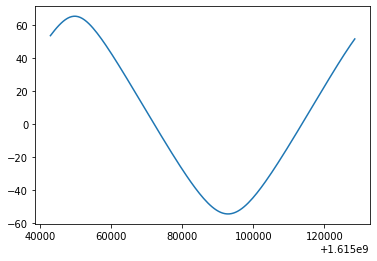

In [204]:
plt.plot([ gg.unix for gg in grid], sun_alt)

In [213]:
%%time
sunset, sunrise = ctio.get_sunriseset ( 2021, 3, 6, alt=-10. )
middle = sunset + 0.5*(sunrise-sunset)

print(f'START: {sunset.strftime(fmt)} UTC; {sunset.astimezone(et).strftime(fmt)} ET')
print(f'MID:   {middle.strftime(fmt)} UTC; {middle.astimezone(et).strftime(fmt)} ET')
print(f'END:   {sunrise.strftime(fmt)} UTC; {sunrise.astimezone(et).strftime(fmt)} ET')

START: 2021/03/06 11:54 PM UTC; 2021/03/06 06:54 PM ET
MID:   2021/03/07 04:54 AM UTC; 2021/03/06 11:54 PM ET
END:   2021/03/07 09:55 AM UTC; 2021/03/07 04:55 AM ET
CPU times: user 3.53 s, sys: 55.3 ms, total: 3.59 s
Wall time: 3.69 s


In [93]:
is_queued = pd.DataFrame ( index=mastercat.index, columns=['is_queued','qstamp','has_priority'])
is_queued['is_queued'] = False
is_queued.loc[has_observed, 'is_queued'] = True

In [94]:
# \\ Define the observatory site -- default is CTIO
ctio = observe.ObservingSite ()
priorities = {'COSMOS':0, 'GAMA':1}

In [96]:
obs_start, twibeg = ctio.get_sunriseset ( 2021, 3, 6 )
obs_end = obs_start + 0.5*(twibeg-obs_start)

print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
print(f"          {obs_start.strftime(fmt)} UTC")
print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
print(f"          {obs_end.strftime(fmt)} UTC")

is_queued_tmrw = ocat.plan_night ( obs_start, ctio, catalog=mastercat, obs_end=obs_end,
                                 is_queued=is_queued.copy(),
                                 maxairmass=1.5, object_priority=priorities, save=False )

obsStart: 2021/03/06 09:18 PM Santiago
          2021/03/06 07:18 PM ET
          2021/03/07 12:18 AM UTC
obsEnd:   2021/03/07 01:57 AM Santiago
          2021/03/06 11:57 PM ET
          2021/03/07 04:57 AM UTC
2021-03-07 04:00:00
==> 20210307_00, 2520.000000000004s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
[to_json] Inserting 60s focus exposures
[to_json] Inserting CheckSky 60s exposures
QA COMPLETE: All tests passed
==> 20210307_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
[to_json] Inserting 60s focus exposures
[to_json] Big slew from GAMA_J084129.87-004559.69_N708 to COSMOS_J100021.44+021535.51_N708
==> 20210307_02, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
[to_json] Inserting 60s focus exposures
QA COMPLETE: All tests passed
==> 20210307_03, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
[to

In [132]:
(3420. - (1200.+1880.))/60.

5.666666666666667

In [129]:
obs_start, twibeg = ctio.get_sunriseset ( 2021, 3, 6 )
obs_end = obs_start + 0.5*(twibeg-obs_start)

print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
print(f"          {obs_start.strftime(fmt)} UTC")
print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
print(f"          {obs_end.strftime(fmt)} UTC")

obsStart: 2021/03/06 09:13 PM Santiago
          2021/03/06 07:13 PM ET
          2021/03/07 12:13 AM UTC
obsEnd:   2021/03/07 01:54 AM Santiago
          2021/03/06 11:54 PM ET
          2021/03/07 04:54 AM UTC
